In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

##display all the columns of the dataset
pd.pandas.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv("insurance.csv")
df2 = pd.read_csv("insurance.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
df.groupby('region')['expenses'].max()

region
northeast    58571.07
northwest    60021.40
southeast    63770.43
southwest    52590.83
Name: expenses, dtype: float64

In [ ]:
df.groupby('sex')['expenses'].max()

sex
female    63770.43
male      62592.87
Name: expenses, dtype: float64

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.groupby(['region','expenses'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

<ipython-input-17-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

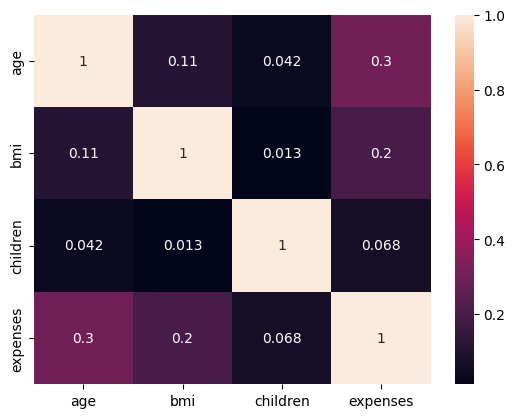

In [ ]:
sns.heatmap(df.corr(), annot=True)

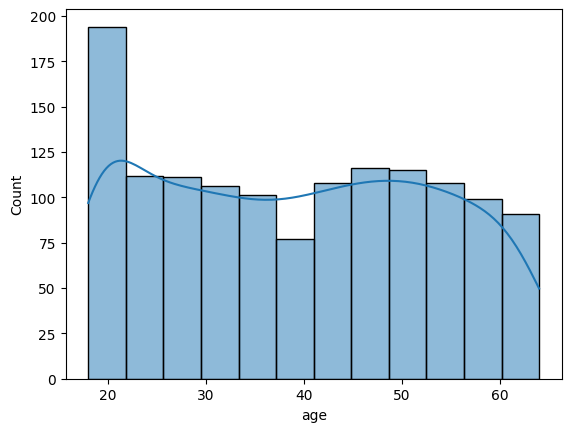

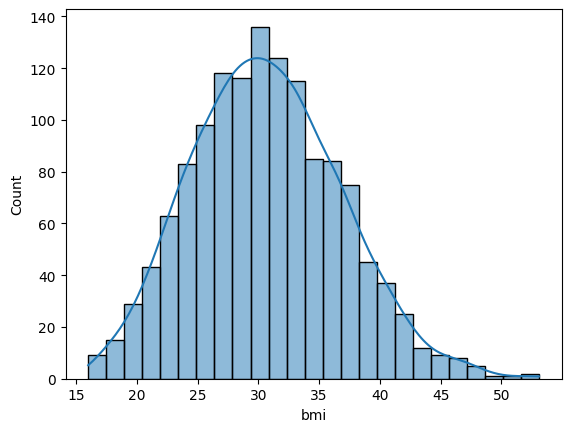

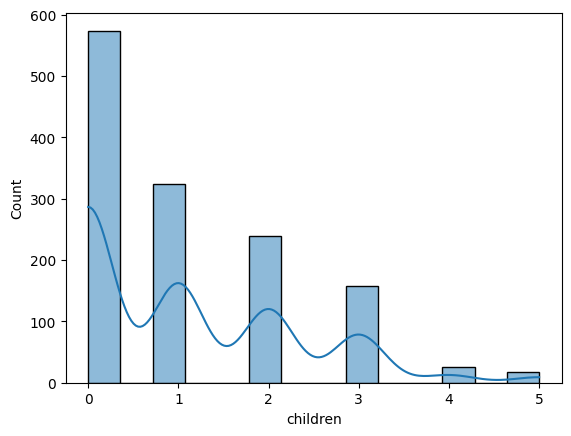

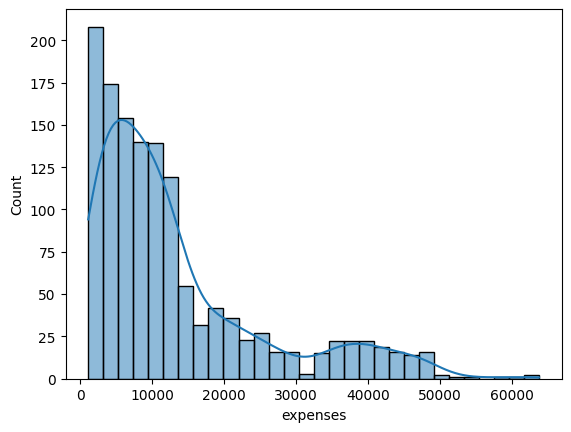

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']


for i in numerical_features:
  sns.histplot(data=df , x=i ,kde=True )
  plt.show()

In [ ]:
df.groupby('smoker')['expenses'].max()

smoker
no     36910.61
yes    63770.43
Name: expenses, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df['sex']=labelencoder.fit_transform(df['sex'])
df['sex']=df['sex'].astype('int')

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95
1337,61,0,29.1,0,yes,northwest,29141.36


In [ ]:
df['smoker']=labelencoder.fit_transform(df['smoker'])
df['smoker']=df['smoker'].astype('int')

In [ ]:
df['region']=labelencoder.fit_transform(df['region'])
df['region']=df['region'].astype('int')

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,1,30.6,0,0,1,1639.56


In [ ]:
df[['region','expenses']]

,region,expenses
0,3,16884.92
1,2,1725.55
2,2,4449.46
3,1,21984.47
4,1,3866.86
...,...,...
1333,1,10600.55
1334,0,2205.98
1335,2,1629.83
1336,3,2007.95


<Axes: xlabel='bmi', ylabel='expenses'>

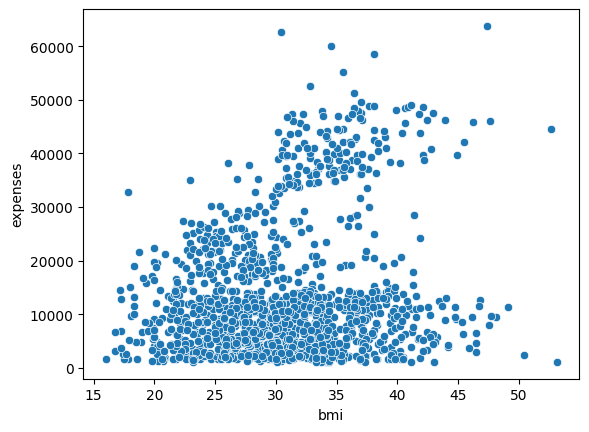

In [ ]:
import seaborn as sns

sns.scatterplot(x=df['bmi'],y=df['expenses'])

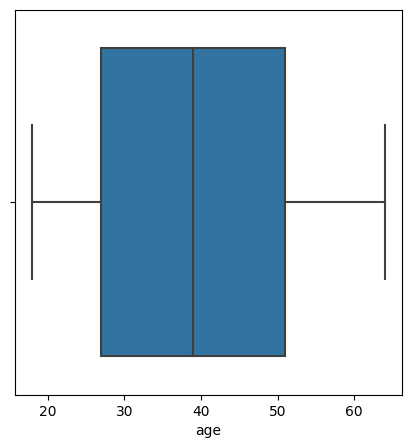

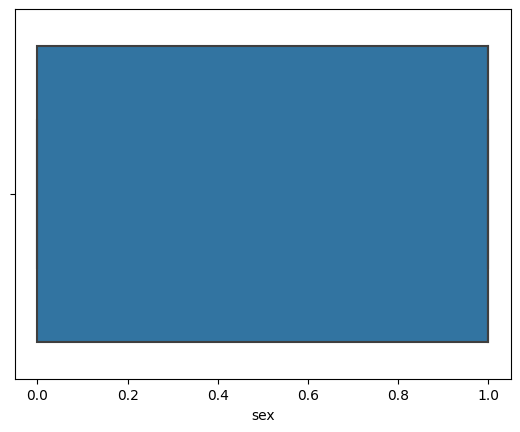

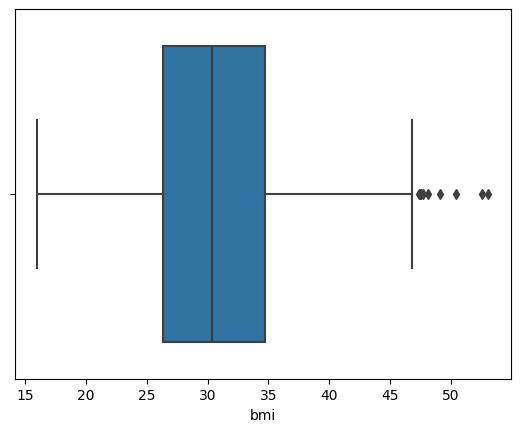

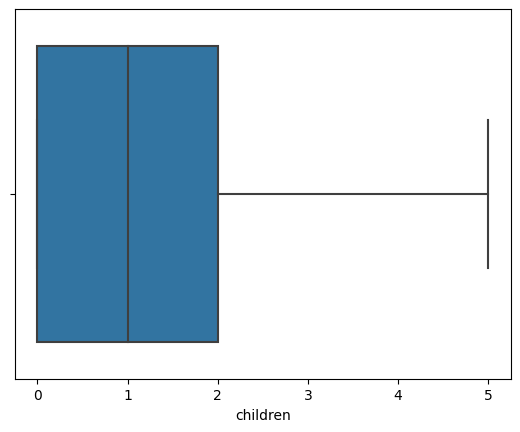

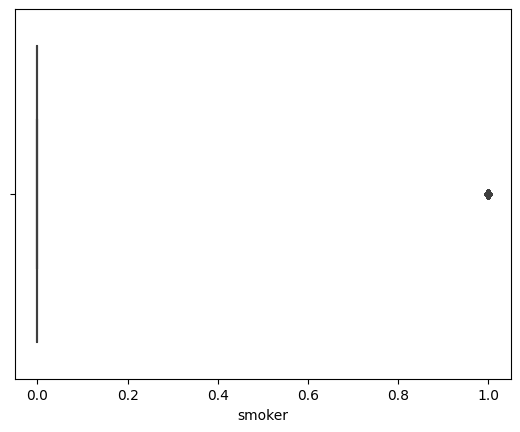

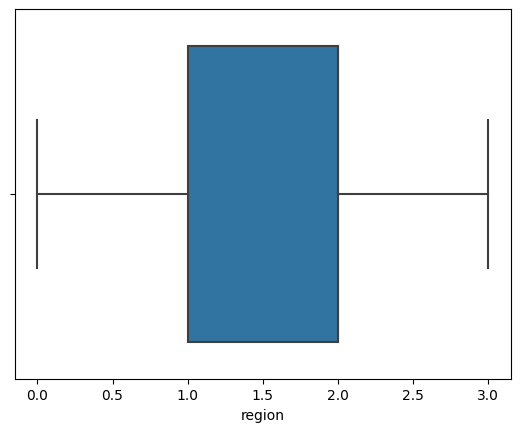

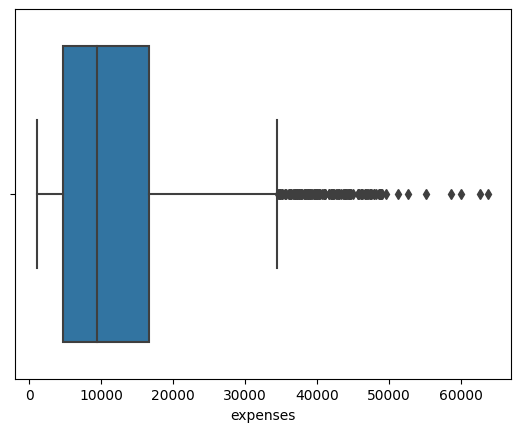

In [ ]:
plt.figure(figsize=(5,5))
for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()

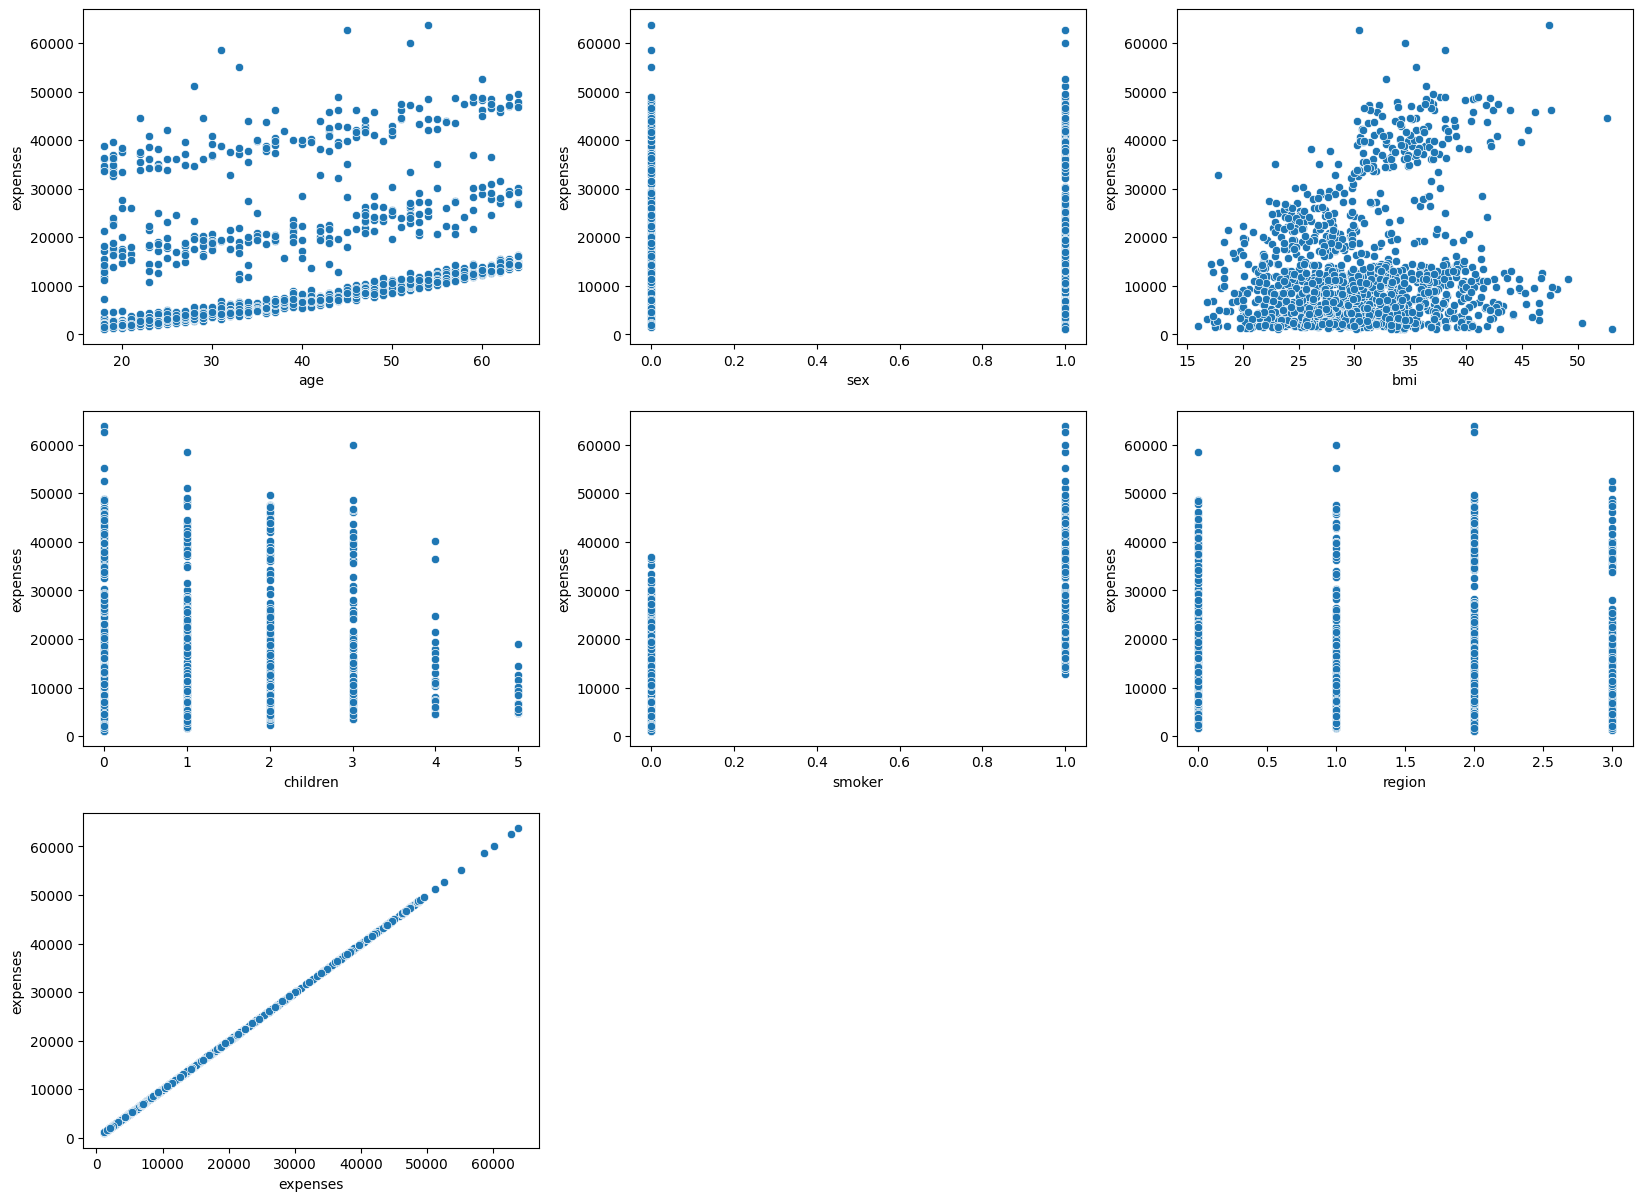

In [ ]:
import matplotlib.pyplot as plot
import seaborn as sns
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(x=df[column],y=df['expenses'])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [ ]:
#for smokers expenses are more as compared to non smokers

In [ ]:
X = df2.drop(labels=['expenses'],axis=1)
Y = df2['expenses']

In [ ]:
Y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)
numerical_cols = X.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children'], dtype='object')


In [ ]:
## now we will handle missing values using SIMPLE IMPUTER
## automate the whole process using pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipeline= Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler(with_mean=False))
    ]
)

##Categorical Pipeline

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
1077,21,male,26.0,0,no,northeast
61,25,male,33.7,4,no,southeast
796,30,male,44.2,2,no,southeast
1061,57,male,27.9,1,no,southeast
69,28,male,24.0,3,yes,southeast
...,...,...,...,...,...,...
919,35,female,34.2,1,no,southeast
1164,41,female,28.3,1,no,northwest
500,29,male,34.4,0,yes,southwest
941,50,female,46.1,1,no,southeast


In [ ]:
y_train

1077     2102.26
61       4504.66
796      4266.17
1061    11554.22
69      17663.14
          ...   
919      5245.23
1164     7153.55
500     36197.70
941      9549.57
421     46599.11
Name: expenses, Length: 936, dtype: float64

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [ ]:
X_train

,num_pipeline__age,num_pipeline__bmi,num_pipeline__children,cat_pipeline__sex_female,cat_pipeline__sex_male,cat_pipeline__smoker_no,cat_pipeline__smoker_yes,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest
0,1.485070,4.240141,0.000000,0.000000,2.000041,2.467022,0.000000,2.381225,0.000000,0.000000,0.000000
1,1.767940,5.495876,3.362499,0.000000,2.000041,2.467022,0.000000,0.000000,0.000000,2.224797,0.000000
2,2.121528,7.208240,1.681249,0.000000,2.000041,2.467022,0.000000,0.000000,0.000000,2.224797,0.000000
3,4.030903,4.549998,0.840625,0.000000,2.000041,2.467022,0.000000,0.000000,0.000000,2.224797,0.000000
4,1.980093,3.913977,2.521874,0.000000,2.000041,0.000000,2.467022,0.000000,0.000000,2.224797,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
931,2.475116,5.577417,0.840625,2.000041,0.000000,2.467022,0.000000,0.000000,0.000000,2.224797,0.000000
932,2.899422,4.615231,0.840625,2.000041,0.000000,2.467022,0.000000,0.000000,2.326207,0.000000,0.000000
933,2.050811,5.610033,0.000000,0.000000,2.000041,0.000000,2.467022,0.000000,0.000000,0.000000,2.322788
934,3.535880,7.518097,0.840625,2.000041,0.000000,2.467022,0.000000,0.000000,0.000000,2.224797,0.000000


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor

In [ ]:
models={
    'LinearRegression':LinearRegression(),
    'L1_regularization':Lasso(),
    'L2_regularization':Ridge(),
    'ElasticNet':ElasticNet(),
    'XGBoost':xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123),
    'RandomForest':RandomForestRegressor(n_estimators = 10)
}


import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
for i in list(models.values()):
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    mae,rmse,r2_square= evaluate_model(y_test,y_pred)

    print(f"Model: {i}")
    print(f"mae: {mae}, rmse: {rmse}, r2_score: {r2_square}")

Model: LinearRegression()
mae: 4028.783993314677, rmse: 5854.944401165985, r2_score: 0.7634667787885514
Model: Lasso()
mae: 4028.5978417000792, rmse: 5855.1097853099645, r2_score: 0.7634534159300421
Model: Ridge()
mae: 4028.7131234209137, rmse: 5854.951527799283, r2_score: 0.7634662029721333
Model: ElasticNet()
mae: 4523.894845989983, rmse: 6337.585597006636, r2_score: 0.7228631529882954
[13:59:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
      

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100,oob_score=True, random_state = 0)


regressor.fit(X_train,y_train)


RandomForestRegressor(oob_score=True, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
grid_param={
    'n_estimators': [10, 15, 20, 25, 30,40,50,70,100],
    'max_depth': [1,2,3,4,5,10,20],
     'ccp_alpha':[0, 1,2]
}

In [ ]:
grid_search = GridSearchCV(param_grid= grid_param , estimator= regressor,cv=10)

In [ ]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(oob_score=True, random_state=0),
             param_grid={'ccp_alpha': [0, 1, 2],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20],
                         'n_estimators': [10, 15, 20, 25, 30, 40, 50, 70, 100]})

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0, 'max_depth': 4, 'n_estimators': 100}

In [ ]:
best_regressor= RandomForestRegressor(n_estimators = 100, max_depth=4,oob_score=True, random_state = 100)


best_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, oob_score=True, random_state=100)

In [ ]:
y_pred = best_regressor.predict(X_test)

In [ ]:
best_regressor.score(X_train,y_train) ##training accuracy

0.8835245032180901

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(ccp_alpha=0, max_depth=4, oob_score=True, random_state=0)

In [ ]:
def adj_r2(x,y):
    r2= best_regressor.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2= 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print(adj_r2(X_test,y_test))

0.8383347972830993


In [ ]:
mean_absolute_error(y_test,y_pred)

2660.3894193674887

In [ ]:
r2_score(y_test,y_pred) ##testing_accuracy

0.8427695035920417